In [23]:
import tarfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Representative genome directory

In [ ]:
genome_dir = "../../data/gtdb/226.0/genomic_files_reps/gtdb_genomes_reps_r226.tar.gz"


# Metadata

In [2]:
metadata_bac_path = "/home/yasutake/research/projects/metagenome/data/gtdb/226.0/bac120_metadata_r226.tsv.gz"
df_bac = pd.read_csv(metadata_bac_path, sep="\t", dtype=str)
df_bac

,accession,ambiguous_bases,checkm2_completeness,checkm2_contamination,checkm2_model,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,...,ssu_silva_blast_align_len,ssu_silva_blast_bitscore,ssu_silva_blast_evalue,ssu_silva_blast_perc_identity,ssu_silva_blast_subject_id,ssu_silva_taxonomy,total_gap_length,trna_aa_count,trna_count,trna_selenocysteine_count
0,RS_GCF_034719275.1,0,100,0.01,Specific,99.93,0.19,1207,f__Enterobacteriaceae (UID5162),328,...,726,1341,0,100,CXHO01000048.496.1989,Bacteria;Pseudomonadota;Gammaproteobacteria;En...,779,19,89,1
1,RS_GCF_029946345.1,0,100,0.08,Specific,99.97,0.22,1173,f__Enterobacteriaceae (UID5124),336,...,1444,2667,0,100,CU928160.2796681.2798222,Bacteria;Pseudomonadota;Gammaproteobacteria;En...,0,19,82,1
2,RS_GCF_035810195.1,0,100,0,Specific,99.44,0.18,1200,g__Bacillus (UID865),269,...,1548,2859,0,100,CP032860.1716627.1718179,Bacteria;Bacillota;Bacilli;Bacillales;Bacillac...,438,19,82,0
3,RS_GCF_025190015.1,0,100,1.01,Specific,99.07,2.78,367,o__Lactobacillales (UID462),162,...,1237,2285,0,100,CP032744.1988500.1990075,Bacteria;Bacillota;Bacilli;Lactobacillales;Lac...,0,19,62,0
4,RS_GCF_018791735.1,0,100,0,Specific,99.91,0.05,1173,f__Enterobacteriaceae (UID5124),336,...,1539,2832,0,99.87,CP010235.4601174.4602729,Bacteria;Pseudomonadota;Gammaproteobacteria;En...,0,19,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715225,RS_GCF_002250095.2,0,100,0.17,Specific,99.61,0.33,805,g__Staphylococcus (UID298),176,...,1549,2861,0,100,CP023970.2403006.2404561,Bacteria;Bacillota;Bacilli;Staphylococcales;St...,0,19,69,0
715226,GB_GCA_031572565.1,0,100,1.82,Specific,99.98,3.61,1193,g__Acinetobacter (UID4685),254,...,1533,2832,0,100,CP029569.1991081.1992620,Bacteria;Pseudomonadota;Gammaproteobacteria;Ps...,0,19,74,0
715227,GB_GCA_035391105.1,0,81.22,0.41,Specific,81.66,1.73,529,c__Alphaproteobacteria (UID3422),308,...,292,507,4.39e-142,97.945,AF082793.1.1354,Bacteria;Pseudomonadota;Alphaproteobacteria;Ca...,7900,15,24,0
715228,RS_GCF_031627535.1,0,100,1.09,Specific,99.97,0.22,1173,f__Enterobacteriaceae (UID5124),336,...,1539,2843,0,100,CP033401.4049581.4051134,Bacteria;Pseudomonadota;Gammaproteobacteria;En...,0,19,86,1


In [3]:
for col in df_bac.columns:
    print(col)

accession
ambiguous_bases
checkm2_completeness
checkm2_contamination
checkm2_model
checkm_completeness
checkm_contamination
checkm_marker_count
checkm_marker_lineage
checkm_marker_set_count
checkm_strain_heterogeneity
coding_bases
coding_density
contig_count
gc_count
gc_percentage
genome_size
gtdb_genome_representative
gtdb_representative
gtdb_taxonomy
gtdb_type_designation_ncbi_taxa
gtdb_type_designation_ncbi_taxa_sources
gtdb_type_species_of_genus
l50_contigs
l50_scaffolds
longest_contig
longest_scaffold
lsu_23s_contig_len
lsu_23s_count
lsu_23s_length
lsu_23s_query_id
lsu_5s_contig_len
lsu_5s_count
lsu_5s_length
lsu_5s_query_id
lsu_silva_23s_blast_align_len
lsu_silva_23s_blast_bitscore
lsu_silva_23s_blast_evalue
lsu_silva_23s_blast_perc_identity
lsu_silva_23s_blast_subject_id
lsu_silva_23s_taxonomy
mean_contig_length
mean_scaffold_length
mimag_high_quality
mimag_low_quality
mimag_medium_quality
n50_contigs
n50_scaffolds
ncbi_assembly_level
ncbi_assembly_name
ncbi_assembly_type
ncbi_b

Text(0.5, 1.0, 'N ratio')

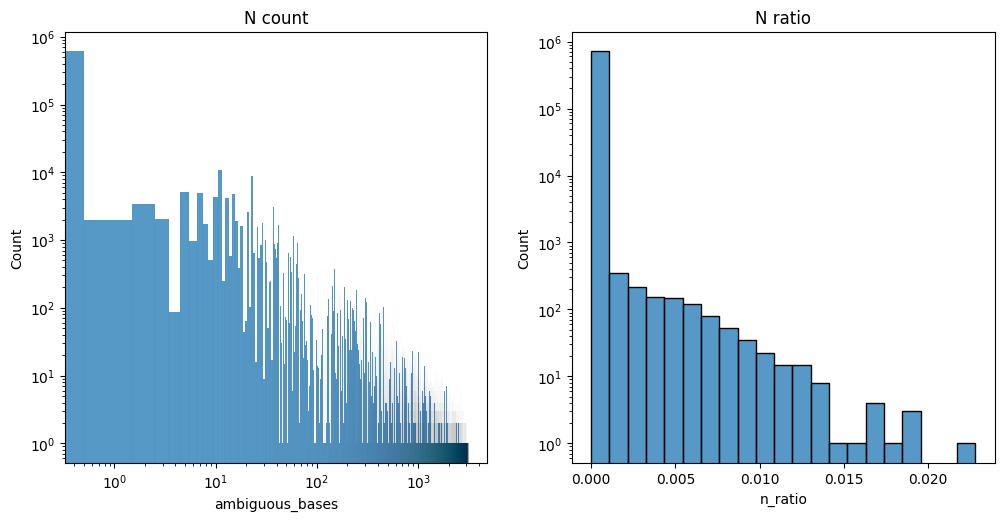

In [19]:
df_bac["n_ratio"] = df_bac["ambiguous_bases"].astype('float')/df_bac["genome_size"].astype('float')
fig, ax = plt.subplots(1, 2, figsize=(12, 5.6))

sns.histplot(
    data=df_bac, x="ambiguous_bases", 
    ax=ax[0]
)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title("N count")

sns.histplot(
    data=df_bac, x="n_ratio", 
    ax=ax[1]
)
# ax.set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_title("N ratio")

In [21]:
df_bac["gtdb_taxonomy"]

0         d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
1         d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
2         d__Bacteria;p__Bacillota;c__Bacilli;o__Bacilla...
3         d__Bacteria;p__Bacillota;c__Bacilli;o__Lactoba...
4         d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
                                ...                        
715225    d__Bacteria;p__Bacillota;c__Bacilli;o__Staphyl...
715226    d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
715227    d__Bacteria;p__Pseudomonadota;c__Alphaproteoba...
715228    d__Bacteria;p__Pseudomonadota;c__Gammaproteoba...
715229    d__Bacteria;p__Bacillota;c__Clostridia;o__Clos...
Name: gtdb_taxonomy, Length: 715230, dtype: object